<a href="https://colab.research.google.com/github/rbbh/ARIMA-SVR-PSO-ensemble/blob/master/ARIMA_%2B_SVR_%2B_PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import svm
from mpl_toolkits.mplot3d import axes3d, Axes3D
from google.colab import files

In [0]:
import io
import pandas as pd

In [4]:
uploaded = files.upload()   

Saving coloradoRiver.txt to coloradoRiver.txt


In [0]:
data = pd.read_csv(io.BytesIO(uploaded['coloradoRiver.txt']))

In [6]:
uploaded = files.upload()

Saving coloradoRiver_ARIMA.txt to coloradoRiver_ARIMA.txt


In [0]:
data_ARIMA = pd.read_csv(io.BytesIO(uploaded['coloradoRiver_ARIMA.txt']))

In [8]:
uploaded = files.upload()

Saving coloradoRiver_r.txt to coloradoRiver_r.txt


In [0]:
data_r = pd.read_csv(io.BytesIO(uploaded['coloradoRiver_r.txt']))

In [10]:
data_r.describe()

,Residuo
count,744.000000
mean,-0.118830
std,0.970548
min,-4.314714
25%,-0.568110
50%,-0.350432
75%,0.093252
max,5.365810


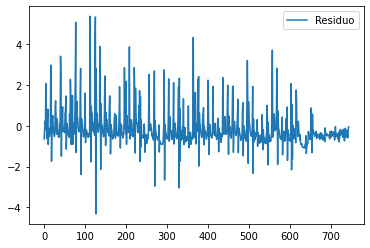

In [11]:
data_r.plot()

In [12]:
len(data)

744

In [0]:
#Scaling the data
from sklearn import preprocessing

data_r_n = (data_r - data_r.min())/(data_r.max() - data_r.min())

data_r_n = pd.DataFrame(data_r_n)



In [14]:
# TODO: Create function for the Lag used for the prediction
# We will use 12 for the lag dimension if the series repeats 
# itself annually, 3 if it is trimestrial etc.

# Note: For the "ONS" data base, make "dimensions" = 3
# NOTE: For the "Milk" data base, make "dimensions" = 24

dimensions = 12
data_cn = pd.concat([data_r_n.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_cn)

      Residuo   Residuo   Residuo  ...   Residuo   Residuo   Residuo
0    0.378795       NaN       NaN  ...       NaN       NaN       NaN
1    0.419852  0.378795       NaN  ...       NaN       NaN       NaN
2    0.468420  0.419852  0.378795  ...       NaN       NaN       NaN
3    0.430527  0.468420  0.419852  ...       NaN       NaN       NaN
4    0.659699  0.430527  0.468420  ...       NaN       NaN       NaN
..        ...       ...       ...  ...       ...       ...       ...
739  0.423610  0.422480  0.388125  ...  0.388466  0.405550  0.406346
740  0.409889  0.423610  0.422480  ...  0.428060  0.388466  0.405550
741  0.384481  0.409889  0.423610  ...  0.421167  0.428060  0.388466
742  0.418838  0.384481  0.409889  ...  0.394989  0.421167  0.428060
743  0.441343  0.418838  0.384481  ...  0.369361  0.394989  0.421167

[744 rows x 13 columns]


In [15]:
# Splitting the residual data into train, validation and test

from sklearn.model_selection import train_test_split

X = data_cn.iloc[12:,1:]

y = data_cn.iloc[12:,0]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.4, shuffle = False)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5, shuffle = False)


print(len(y_val))
print(len(y_test))
print(len(y_train))


146
147
439


In [16]:
dimensions = 12
data_c2n = pd.concat([data_ARIMA.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c2n)

        ARIMA     ARIMA     ARIMA  ...     ARIMA     ARIMA     ARIMA
0    1.107782       NaN       NaN  ...       NaN       NaN       NaN
1    0.780329  1.107782       NaN  ...       NaN       NaN       NaN
2    1.020163  0.780329  1.107782  ...       NaN       NaN       NaN
3    1.626990  1.020163  0.780329  ...       NaN       NaN       NaN
4    1.618485  1.626990  1.020163  ...       NaN       NaN       NaN
..        ...       ...       ...  ...       ...       ...       ...
739  1.443947  1.334886  1.607458  ...  1.264157  1.338776  1.451075
740  1.486771  1.443947  1.334886  ...  1.100866  1.264157  1.338776
741  1.362737  1.486771  1.443947  ...  1.377601  1.100866  1.264157
742  1.080139  1.362737  1.486771  ...  1.471009  1.377601  1.100866
743  1.252280  1.080139  1.362737  ...  1.279104  1.471009  1.377601

[744 rows x 13 columns]


In [19]:
# Splitting the ARIMA predictions into train, validation and test

from sklearn.model_selection import train_test_split

X_ARIMA = data_c2n.iloc[12:,1:]

y_ARIMA = data_c2n.iloc[12:,0]

X_train_ARIMA, X_val_ARIMA, y_train_ARIMA, y_val_ARIMA = train_test_split(X_ARIMA, y_ARIMA, test_size = 0.4, shuffle = False)

X_val_ARIMA, X_test_ARIMA, y_val_ARIMA, y_test_ARIMA = train_test_split(X_val_ARIMA, y_val_ARIMA, test_size = 0.5, shuffle = False)

print(len(y_val_ARIMA))
print(len(y_test_ARIMA))
print(len(y_train_ARIMA))

146
147
439


In [20]:
dimensions = 12
data_c3n = pd.concat([data.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c3n)

        X     X     X     X     X     X  ...     X     X     X     X     X     X
0    0.46   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
1    0.53  0.46   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
2    1.24  0.53  0.46   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
3    1.48  1.24  0.53  0.46   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
4    3.69  1.48  1.24  0.53  0.46   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
..    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
739  1.23  1.11  1.05  1.26  0.95  0.46  ...  0.98  1.14  0.93  0.71  0.95  1.07
740  1.14  1.23  1.11  1.05  1.26  0.95  ...  0.54  0.98  1.14  0.93  0.71  0.95
741  0.77  1.14  1.23  1.11  1.05  1.26  ...  0.46  0.54  0.98  1.14  0.93  0.71
742  0.82  0.77  1.14  1.23  1.11  1.05  ...  0.95  0.46  0.54  0.98  1.14  0.93
743  1.21  0.82  0.77  1.14  1.23  1.11  ...  1.26  0.95  0.46  0.54  0.98  1.14

[744 rows x 13 columns]


In [21]:
# Splitting the raw data into train, validation and test

from sklearn.model_selection import train_test_split

X_raw = data_c3n.iloc[12:,1:]

y_raw = data_c3n.iloc[12:,0]

X_train_raw, X_val_raw, y_train_raw, y_val_raw = train_test_split(X_raw, y_raw, test_size = 0.4, shuffle = False)

X_val_raw, X_test_raw, y_val_raw, y_test_raw = train_test_split(X_val_raw, y_val_raw, test_size = 0.5, shuffle = False)

print(len(y_val_raw))
print(len(y_test_raw))
print(len(y_train_raw))

146
147
439


In [0]:
def pso(n_particles, iterations, dimensions, inertia):

    # Range of SVR's hyperparameters (Particles' search space)
    # C, Epsilon and Gamma
    max_c = 1e4
    min_c = 1e-3
    max_e = 1e-1
    min_e = 1e-8
    max_g = 1e3
    min_g = 1e-3
    
    # Initializing particles' positions randomly, inside
    # the search space
    x = np.random.rand(n_particles, 1)*(max_c - min_c) + min_c
    y = np.random.rand(n_particles, 1)*(max_e - min_e) + min_e
    z = np.random.rand(n_particles, 1)*(max_g - min_g) + min_g

    c = np.concatenate((x,y,z), axis=1)

    # Initializing particles' parameters
    v = np.zeros((n_particles, dimensions))
    c1 = 2
    c2 = 2
    p_best = np.zeros((n_particles, dimensions))
    p_best_val = np.zeros(n_particles) + sys.maxsize  
    g_best = np.zeros(dimensions)
    g_best_val = sys.maxsize

    best_iter = np.zeros(iterations)

    # Initializing regression variables
    p_best_RGS = np.empty((n_particles), dtype = object);
    g_best_RGS = sys.maxsize

    

    # Displaying tridimensional search space
    plot(c)

    from sklearn.metrics import mean_squared_error
    
    for i in range(iterations):

        for j in range(n_particles):
          # Starting Regression
          rgs = svm.SVR(C = c[j][0], epsilon = c[j][1], gamma = c[j][2])

          # Fitting the curve
          rgs.fit(X_train, y_train)
          y_predict = rgs.predict(X_val)

          # Using Mean Squared Error to verify prediction accuracy
          mse = mean_squared_error(y_val, y_predict) 

          # If mse value for that search point, for that particle,
          # is less than its personal best point,
          # replace personal best
          if(mse < p_best_val[j]):   
              # The value below represents the current least Mean Squared Error
              p_best_val[j] = mse
              
              # The value below represents the current least Regressor
              p_best_RGS[j] = rgs
                           

              # The value below represents the current search coordinates for
              # the particle's current least Mean Squared Error found
              p_best[j] = c[j].copy()
              
          # Using auxiliar variable to get the index of the
          # particle that found the configuration with the 
          # minimum MSE value
          aux = np.argmin(p_best_val)        
        
          if(p_best_val[aux] < g_best_val):
              # Assigning Particle's current best MSE to the Group's best    
              g_best_val = p_best_val[aux]

              # Assigning Particle's current best configuration to the Group's best
              g_best = p_best[aux].copy()

              # Group best regressor:
              # the combination of C, Epsilon and Gamma
              # that computes the best fitting curve
              g_best_RGS = p_best_RGS[aux]

        
          rand1 = np.random.random()
          rand2 = np.random.random()

          # The variable below influences directly the particle's velocity.
          # It can either make it smaller or bigger. 
          w = inertia

          # The equation below represents Particle's velocity, which is
          # the rate of change in its position
          v[j] = w*v[j] + c1*(p_best[j] - c[j])*rand1 + c2*(g_best - c[j])*rand2

          # Change in the Particle's position 
          c[j] = c[j] + v[j]

          # Below is a series of conditions that stop the particles from
          # leaving the search space
          if(c[j][2] < min_g):
            c[j][2] = min_g
          if(c[j][2] > max_g):
            c[j][2] = max_g
          if(c[j][1] < min_e):
            c[j][1] = min_e
          if(c[j][1] > max_e):
            c[j][1] = max_e
          if(c[j][0] < min_c):
            c[j][0] = min_c
          if(c[j][0] > max_c):
            c[j][0] = max_c
            
     
        # The variable below represents the least Mean Squared Error
        # of the current iteration
        best_iter[i] = g_best_val
                
        print('Best value iteration # %d = %f\n'%(i, g_best_val))

    # Coordinates found after all the iterations
    print('Group Best configuration found: ')
    print(g_best)
    print('\n')
    print('Best Regressor:\n')
    print(g_best_RGS)
    print('\n')
    
    # Displaying the MSE value variation throughout the iterations
    t = range(iterations)
    plt.plot(t, best_iter, label='Fitness Value')
    plt.legend()
    plt.show()

    # Displaying Particles' final configuration
    plot(c)

    # Making the prediction with the best configuration of C, Epsilon and
    # Gamma found by the particles
    predict_test = g_best_RGS.predict(X_test)

    
    # Displaying actual values and predicted values for
    # Group's best configuration found overall
    print(color.BOLD + 'Predictions with the Population Best Value found:\n' + color.END)

    evaluate(predict_test)  


    # Evaluating the perfomance of the residue predictions + ARIMA predictions when 
    # compared to the ARIMA predictions by itself
    print(color.BOLD + 'Results after combining the residual prediction with the ARIMA prediction:\n' + color.END)
    
    residual_performance(predict_test, y_test_ARIMA, y_test_raw)
      


In [0]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'



In [0]:
# Function that displays tridimensional plot
def plot(some_list):
 
  ax = Axes3D(plt.figure())
  ax.scatter3D(some_list[:,0], some_list[:,1], some_list[:,2], color = 'r')
  ax.set_xlabel('$C$', fontsize = 20)
  ax.set_ylabel('$\epsilon$', fontsize = 25)
  ax.zaxis.set_rotate_label(False) 
  ax.set_zlabel('$\gamma$', fontsize=30, rotation = 0)
  ax.zaxis._axinfo['label']['space_factor'] = 1.0
  plt.show()

  print('\n')
  print('\n')

In [0]:
def evaluate(predictions):

    from sklearn.metrics import mean_squared_error 
    import statistics as st

    predict_test = predictions


    plt.plot(range(len(y_test)), y_test, label='Real')
    plt.plot(range(len(predict_test)), predict_test, label='Predicted')
    plt.legend()
    plt.show()
    
    mse = mean_squared_error(y_test, predict_test)
    print('\n')
    print('\n')
    print('Mean Squared Error for the Test Set:\t %f' %mse)
    print('\n')
    print('\n')
    print('Predictions Average:\t %f' %((predict_test.sum()/len(predict_test))))
    print('\n')
    print('\n')
    print('Predictions Median:\t %f' %(st.median(predict_test)))
    print('\n')
    print('\n')

In [0]:
def residual_performance(residual_predictions, ARIMA_predictions, raw_data):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st


    r_tmp = residual_predictions
    ARIMA = ARIMA_predictions
    data = raw_data

    # Un-scalling the residuals
    #data_r_n = (data_r - data_r.min())/(data_r.max() - data_r.min())
    #data = datan*(max(data)-min(data)) + min(data)

    
    r = r_tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())

        
    final_predictions = r + ARIMA
  

    mse1 = mean_squared_error(final_predictions, data)

    mse2 = mean_squared_error(ARIMA, data)


    print('\nMean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse1)

    print('\nEnsemble Model series` predicitions:\n')

    plt.plot(range(len(data)), data, label='Real')
    plt.plot(range(len(final_predictions)), final_predictions, label='Predicted')
    plt.legend()
    plt.show()

        
    print('\nMean Squared Error for the ARIMA Model:\t %f' %mse2)

    print('\nARIMA Model series` predicitions:\n')

    plt.plot(range(len(data)), data, label='Real')
    plt.plot(range(len(ARIMA)), ARIMA, label='Predicted')
    plt.legend()
    plt.show()



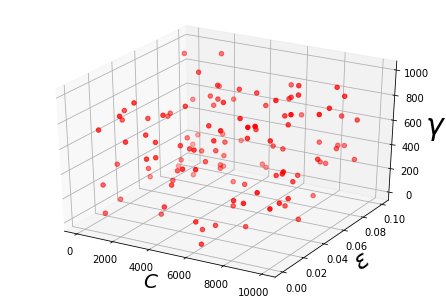





Best value iteration # 0 = 0.006499

Best value iteration # 1 = 0.006219

Best value iteration # 2 = 0.006143

Best value iteration # 3 = 0.006143

Best value iteration # 4 = 0.006136

Best value iteration # 5 = 0.006136

Best value iteration # 6 = 0.006136

Best value iteration # 7 = 0.006136

Best value iteration # 8 = 0.006133

Best value iteration # 9 = 0.006133

Best value iteration # 10 = 0.006123

Best value iteration # 11 = 0.006123

Best value iteration # 12 = 0.006123

Best value iteration # 13 = 0.006123

Best value iteration # 14 = 0.006121

Best value iteration # 15 = 0.006121

Best value iteration # 16 = 0.006121

Best value iteration # 17 = 0.006121

Best value iteration # 18 = 0.006102

Best value iteration # 19 = 0.006102

Best value iteration # 20 = 0.006102

Best value iteration # 21 = 0.006102

Best value iteration # 22 = 0.006094

Best value iteration # 23 = 0.006094

Best value iteration # 24 = 0.006094

Best value iteration # 25 = 0.006094

Best value iterati

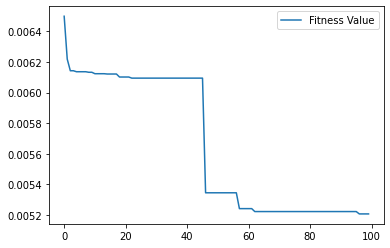

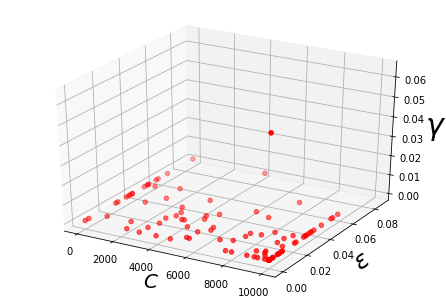





Predictions with the Population Best Value found:



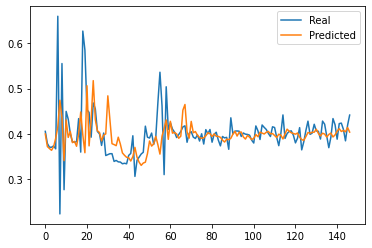





Mean Squared Error for the Test Set:	 0.002766




Predictions Average:	 0.395652




Predictions Median:	 0.396592




Results after combining the residual prediction with the ARIMA prediction:


Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.259166

Ensemble Model series` predicitions:



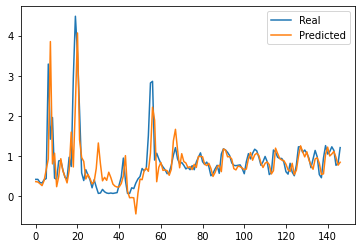


Mean Squared Error for the ARIMA Model:	 0.436444

ARIMA Model series` predicitions:



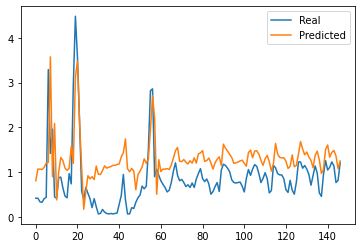

In [0]:
pso(120, 100, 3, 1)

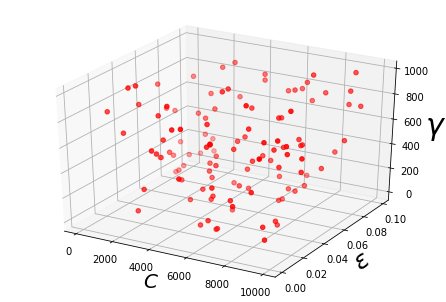





Best value iteration # 0 = 0.006513

Best value iteration # 1 = 0.006228

Best value iteration # 2 = 0.006219

Best value iteration # 3 = 0.006193

Best value iteration # 4 = 0.006177

Best value iteration # 5 = 0.006146

Best value iteration # 6 = 0.006146

Best value iteration # 7 = 0.006146

Best value iteration # 8 = 0.006146

Best value iteration # 9 = 0.006146

Best value iteration # 10 = 0.006146

Best value iteration # 11 = 0.006146

Best value iteration # 12 = 0.006144

Best value iteration # 13 = 0.006144

Best value iteration # 14 = 0.006144

Best value iteration # 15 = 0.006144

Best value iteration # 16 = 0.006144

Best value iteration # 17 = 0.006144

Best value iteration # 18 = 0.006144

Best value iteration # 19 = 0.006144

Best value iteration # 20 = 0.006144

Best value iteration # 21 = 0.006144

Best value iteration # 22 = 0.006144

Best value iteration # 23 = 0.006144

Best value iteration # 24 = 0.006144

Best value iteration # 25 = 0.006144

Best value iterati

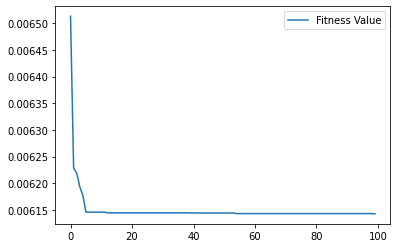

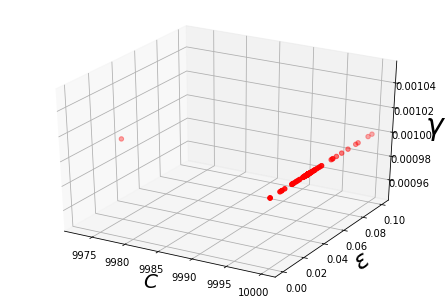





Predictions with the Population Best Value found:



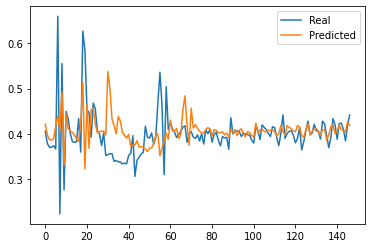





Mean Squared Error for the Test Set:	 0.002754




Predictions Average:	 0.406507




Predictions Median:	 0.405273




Results after combining the residual prediction with the ARIMA prediction:


Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.258131

Ensemble Model series` predicitions:



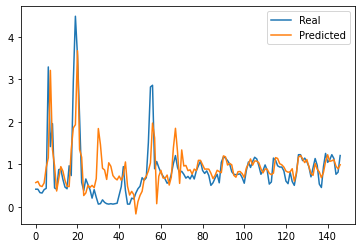


Mean Squared Error for the ARIMA Model:	 0.436444

ARIMA Model series` predicitions:



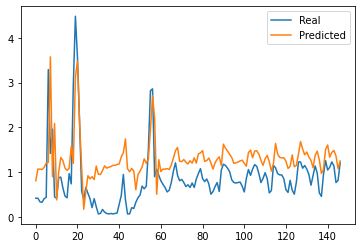

In [27]:
pso(120, 100, 3, 0.8)

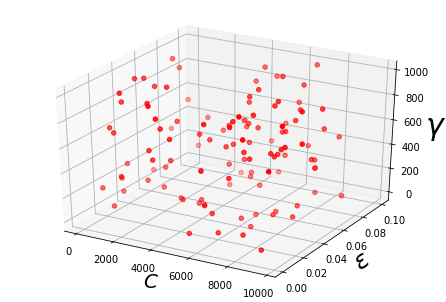





Best value iteration # 0 = 0.006431

Best value iteration # 1 = 0.006160

Best value iteration # 2 = 0.006146

Best value iteration # 3 = 0.006135

Best value iteration # 4 = 0.006135

Best value iteration # 5 = 0.006134

Best value iteration # 6 = 0.006108

Best value iteration # 7 = 0.006108

Best value iteration # 8 = 0.006096

Best value iteration # 9 = 0.006096

Best value iteration # 10 = 0.006096

Best value iteration # 11 = 0.006096

Best value iteration # 12 = 0.006089

Best value iteration # 13 = 0.005840

Best value iteration # 14 = 0.005273

Best value iteration # 15 = 0.005147

Best value iteration # 16 = 0.005147

Best value iteration # 17 = 0.005147

Best value iteration # 18 = 0.005147

Best value iteration # 19 = 0.005122

Best value iteration # 20 = 0.005122

Best value iteration # 21 = 0.005119

Best value iteration # 22 = 0.005119

Best value iteration # 23 = 0.005119

Best value iteration # 24 = 0.005108

Best value iteration # 25 = 0.005099

Best value iterati

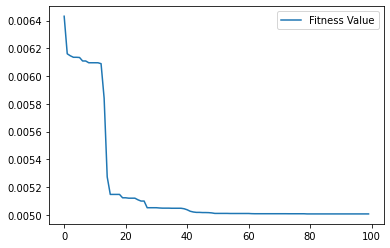

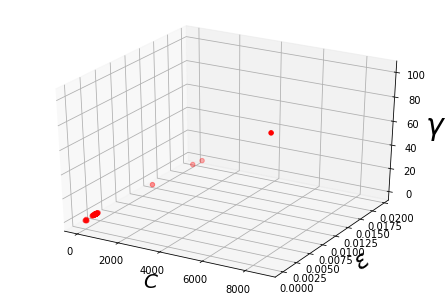





Predictions with the Population Best Value found:



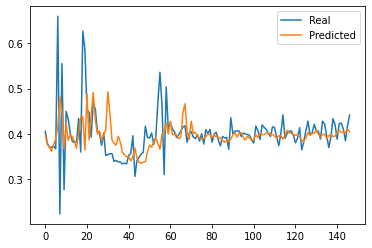





Mean Squared Error for the Test Set:	 0.002639




Predictions Average:	 0.395308




Predictions Median:	 0.395424




Results after combining the residual prediction with the ARIMA prediction:


Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.247341

Ensemble Model series` predicitions:



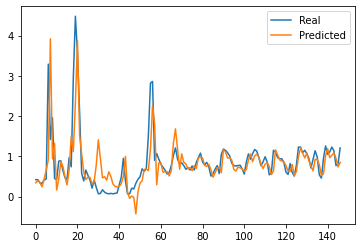


Mean Squared Error for the ARIMA Model:	 0.436444

ARIMA Model series` predicitions:



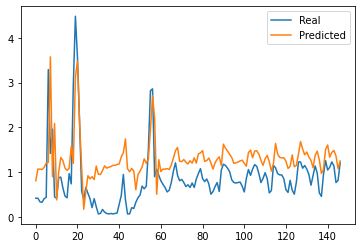

In [28]:
pso(120, 100, 3, 0.6)

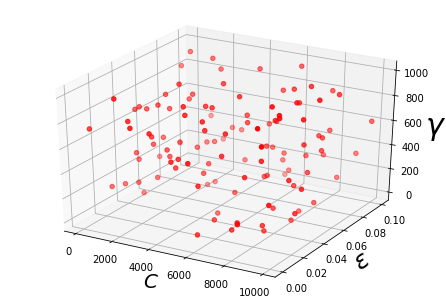





Best value iteration # 0 = 0.006424

Best value iteration # 1 = 0.006209

Best value iteration # 2 = 0.006199

Best value iteration # 3 = 0.006191

Best value iteration # 4 = 0.006152

Best value iteration # 5 = 0.006149

Best value iteration # 6 = 0.006149

Best value iteration # 7 = 0.006149

Best value iteration # 8 = 0.006149

Best value iteration # 9 = 0.006144

Best value iteration # 10 = 0.006144

Best value iteration # 11 = 0.006144

Best value iteration # 12 = 0.006144

Best value iteration # 13 = 0.006144

Best value iteration # 14 = 0.006144

Best value iteration # 15 = 0.006144

Best value iteration # 16 = 0.006144

Best value iteration # 17 = 0.006144

Best value iteration # 18 = 0.006144

Best value iteration # 19 = 0.006144

Best value iteration # 20 = 0.006143

Best value iteration # 21 = 0.006143

Best value iteration # 22 = 0.006143

Best value iteration # 23 = 0.006143

Best value iteration # 24 = 0.006143

Best value iteration # 25 = 0.006143

Best value iterati

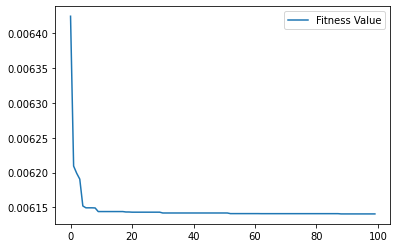

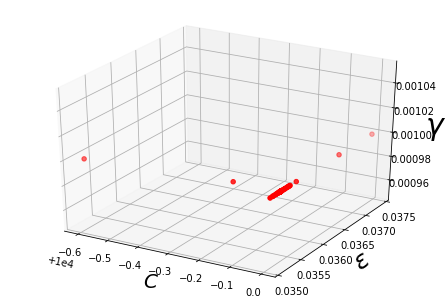





Predictions with the Population Best Value found:



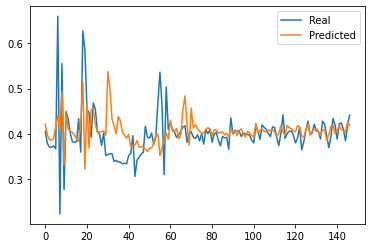





Mean Squared Error for the Test Set:	 0.002753




Predictions Average:	 0.406469




Predictions Median:	 0.404898




Results after combining the residual prediction with the ARIMA prediction:


Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.257944

Ensemble Model series` predicitions:



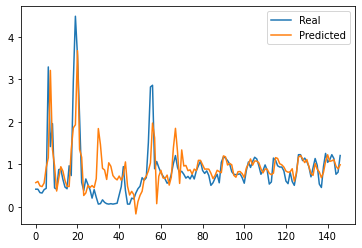


Mean Squared Error for the ARIMA Model:	 0.436444

ARIMA Model series` predicitions:



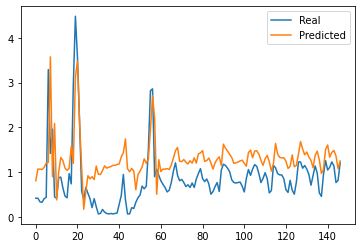

In [29]:
pso(120, 100, 3, 0.2)